In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### You can try different models from https://pytorch.org/docs/stable/torchvision/models.html
#### dataset can be drawn from https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-holidays/

# Reading Image

In [4]:
import torch
print("torch version: ",torch.__version__)
import torchvision
print("torchvision version: ",torchvision.__version__)
import fastai
print("fastai version: ",fastai.__version__)

torch version:  1.7.0+cu101
torchvision version:  0.8.1+cu101
fastai version:  1.0.61


In [3]:
!pip freeze > requirements.txt

Copy dataset zip folder to colab dir

In [5]:
!cp -i /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/dataset.zip /content

unzip dataset.zip

In [6]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/image1938.jpg  
  inflating: dataset/train/image7383.jpg  
  inflating: dataset/train/image5498.jpg  
  inflating: dataset/train/image6955.jpg  
  inflating: dataset/train/image4840.jpg  
  inflating: dataset/train/image2695.jpg  
  inflating: dataset/train/image524.jpg  
  inflating: dataset/train/image1074.jpg  
  inflating: dataset/train/image3524.jpg  
  inflating: dataset/train/image3570.jpg  
  inflating: dataset/train/image8561.jpg  
  inflating: dataset/train/image5242.jpg  
  inflating: dataset/train/image567.jpg  
  inflating: dataset/train/image8431.jpg  
  inflating: dataset/train/image529.jpg  
  inflating: dataset/train/image5156.jpg  
  inflating: dataset/train/image6005.jpg  
  inflating: dataset/train/image6678.jpg  
  inflating: dataset/train/image9808.jpg  
  inflating: dataset/train/image1214.jpg  
  inflating: dataset/train/image6836.jpg  
  inflating: dataset/train/image949.jpg  
  infla

### Folder structure

In [7]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/train
/content/dataset/test


change directory

In [8]:
%cd dataset/

/content/dataset


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import time
import seaborn as sns
import datetime as dt
import warnings
import time
# import required libraries 
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.layers import Flatten,Dense,Dropout,BatchNormalization
from keras.models import Model,Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

from sklearn.preprocessing import LabelEncoder
import os
from heapq import nlargest 
from sklearn.metrics import mean_squared_error
import seaborn as sbn
from sklearn.feature_selection import RFE
sns.set(rc={'figure.figsize':(16,6)})
warnings.filterwarnings(action='ignore')
#pd.options.display.max_columns = 500
#pd.options.display.max_rows = 500
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 500)  
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [10]:
# Load train and test csv file for image class
train_original = pd.read_csv('train.csv')
#test_original = pd.read_csv('test.csv')

In [11]:
train = train_original.copy()
#test = test_original.copy()

#train['image_id'] = train['image_id']+str('.jpg')
#test['image_id'] = test['image_id']+str('.jpg')

train.to_csv('Train_custom.csv',index=False)
#test.to_csv('Test_custom.csv',index=False)
train.head()

Image          Class
0  image3476.jpg  Miscellaneous
1  image5198.jpg         Candle
2  image4183.jpg        Snowman
3  image1806.jpg  Miscellaneous
4  image7831.jpg  Miscellaneous

#### create dataset in different folders that we can pass directly to our model

In [12]:
!mkdir created
!mkdir created/train_set

In [13]:
for i in train.Class.unique():
  os.mkdir("created/train_set/"+i)
#for i in train.breed.unique():
 # shutil.rmtree("created/train_set/"+i)

In [14]:
import shutil
for i,j in zip(train.Image,train.Class):
    try:
      source = "/content/dataset/train/"+i
      #img = cv2.imread(source)
      destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)
      shutil.copy(source, destination)
    except:
      continue  

In [15]:
for i in train.Class.unique():
  print(i ," : ",len(os.listdir("created/train_set/"+i)))

Miscellaneous  :  2801
Candle  :  593
Snowman  :  361
Airplane  :  535
Christmas_Tree  :  1539
Jacket  :  640


## 2. Image Recognition

### folder structure

In [16]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/train
/content/dataset/test
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/Jacket
/content/dataset/created/train_set/Candle
/content/dataset/created/train_set/Airplane
/content/dataset/created/train_set/Miscellaneous
/content/dataset/created/train_set/Snowman
/content/dataset/created/train_set/Christmas_Tree


### Initialization

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
from fastai.vision import *
from fastai.metrics import error_rate

In [19]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/dataset/created/train_set'

In [20]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  6 classes:
 ['Jacket', 'Candle', 'Airplane', 'Miscellaneous', 'Snowman', 'Christmas_Tree']


In [21]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Jacket


Class: Candle


Class: Airplane


Class: Miscellaneous


Class: Snowman


Class: Christmas_Tree


### Creating and training the classifier

In [22]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.1).normalize(imagenet_stats)
#get_transforms is for data augmentation

In [23]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 5823 training images and 646 validation images.


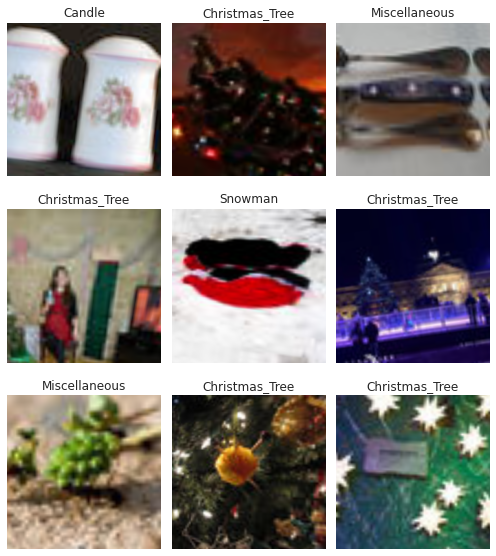

In [24]:
data.show_batch(rows=3, figsize=(7,8))

# RESNET101

In [38]:
learn = cnn_learner(data, models.resnet101, metrics=[accuracy, error_rate, Recall(), Precision()])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


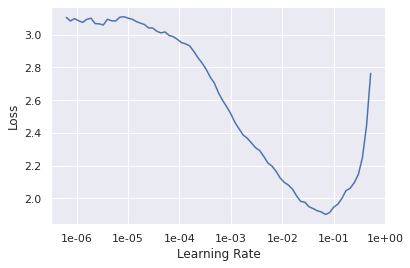

In [39]:
learn.lr_find();
learn.recorder.plot()

In [40]:
#learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-2))

## 3. Results Interpretation and Visualization

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

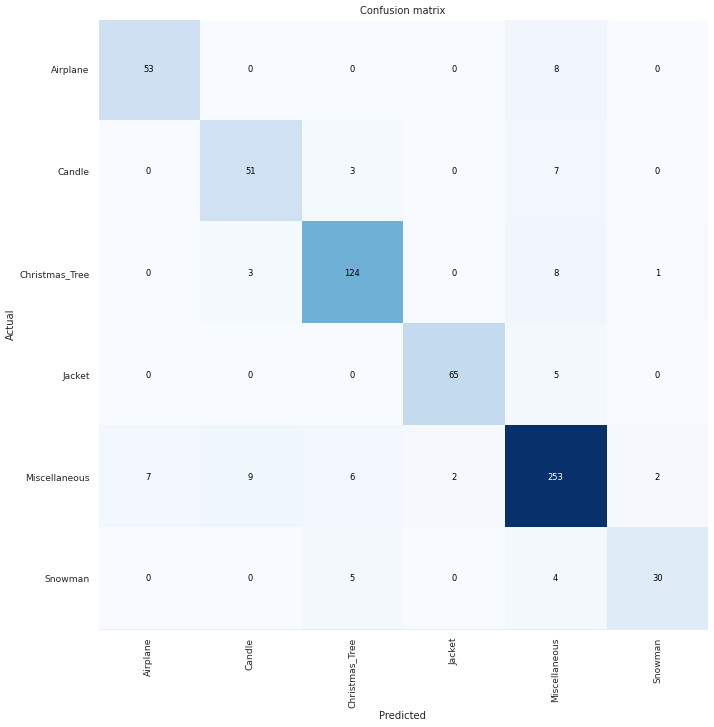

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

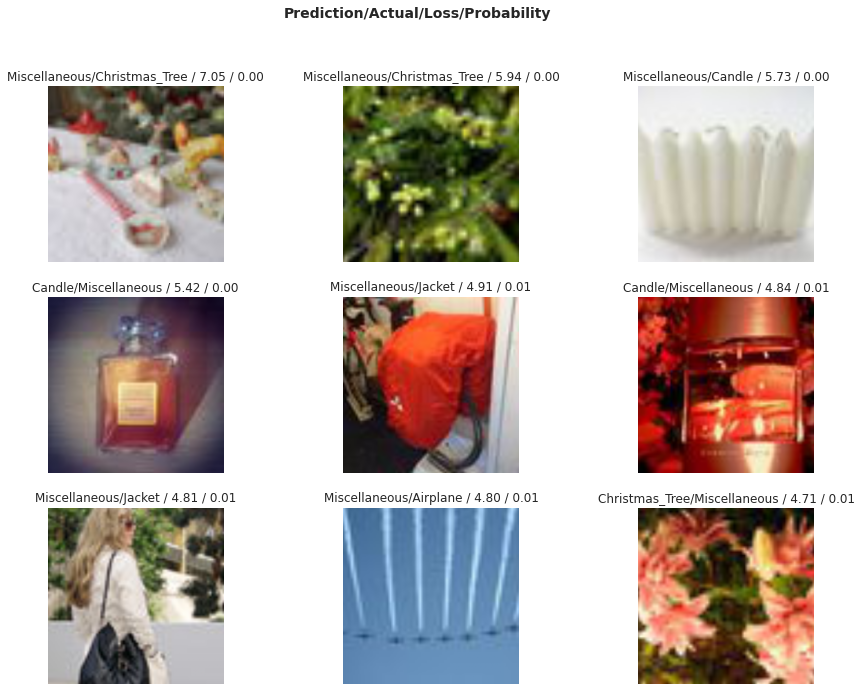

In [43]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## 4. Testing the model on a new image

In [44]:
test = pd.DataFrame()
test['Image'] = os.listdir('test')
test.head()

Image
0   image715.jpg
1  image2029.jpg
2  image6577.jpg
3  image9721.jpg
4  image3077.jpg

In [45]:
try:
  import os
  os.mkdir("results")
except:
  pass

In [47]:
lis = []
path = "results/"
for i in test.Image:
  source = r"/content/dataset/test/"+i
  destination = r"/content/dataset/results/"+i
  shutil.copy(source, destination)
  img = open_image(get_image_files(path)[0])
  pred_class,pred_idx,outputs = learn.predict(img)
  #img.show()
  lis.append(pred_class)
  print ("It is a", pred_class)
  os.remove(destination)
      #img = cv2.imread(source)
      #destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)

It is a Miscellaneous
It is a Snowman
It is a Miscellaneous
It is a Jacket
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Candle
It is a Christmas_Tree
It is a Jacket
It is a Snowman
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Candle
It is a Jacket
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Airplane
It is a Airplane
It is a Candle
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Jacket
It is a Christmas_Tree
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Candle
It is a Airplane
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman


In [48]:
test['Class'] = lis

In [49]:
test.to_csv("resnet101.csv",index=False)

In [50]:
!cp resnet101.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/
!cp /content/requirements.txt /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/

It is a Miscellaneous


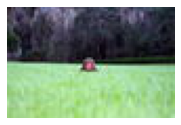

In [51]:
path = './test' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

## Display folder structure

In [ ]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/crotalus-viridis
/content/dataset/created/train_set/crotalus-ruber
/content/dataset/created/train_set/diadophis-punctatus
/content/dataset/created/train_set/agkistrodon-piscivorus
/content/dataset/created/train_set/pantherophis-alleghaniensis
/content/dataset/created/train_set/lampropeltis-californiae
/content/dataset/created/train_set/pantherophis-guttatus
/content/dataset/created/train_set/crotalus-scutulatus
/content/dataset/created/train_set/crotalus-atrox
/content/dataset/created/train_set/nerodia-fasciata
/content/dataset/created/train_set/agkistrodon-contortrix
/content/dataset/created/train_set/rhinocheilus-lecontei
/content/dataset/created/train_set/pantherophis-vulpinus
/content/dataset/created/train_set/storeria-dekayi
/content/dataset/created/train_set/thamnophis-elegans
/content/dataset/created/train_set/crotalus-horridus
/content/dataset/created/train_set/opheod

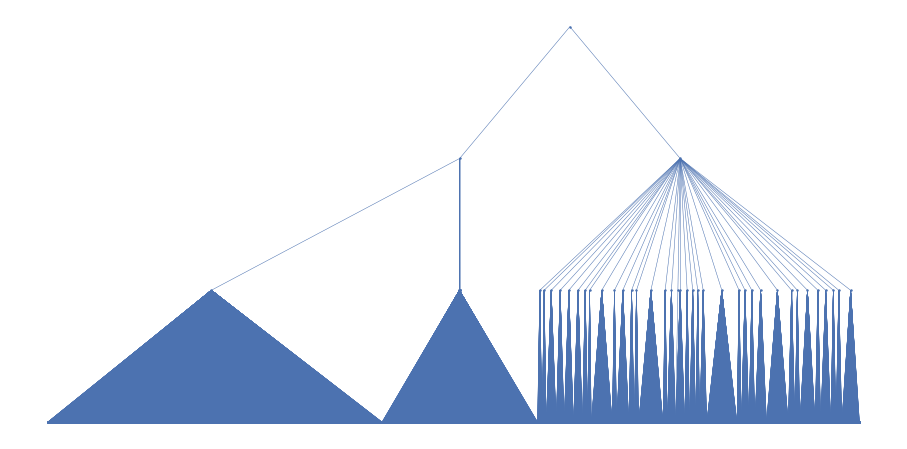

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

# RESNET50

In [53]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate, Recall(), Precision()])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


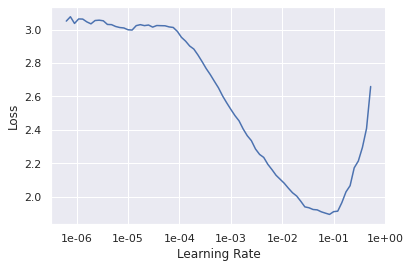

In [54]:
learn.lr_find();
learn.recorder.plot()

In [55]:
#learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-2))

## 3. Results Interpretation and Visualization

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

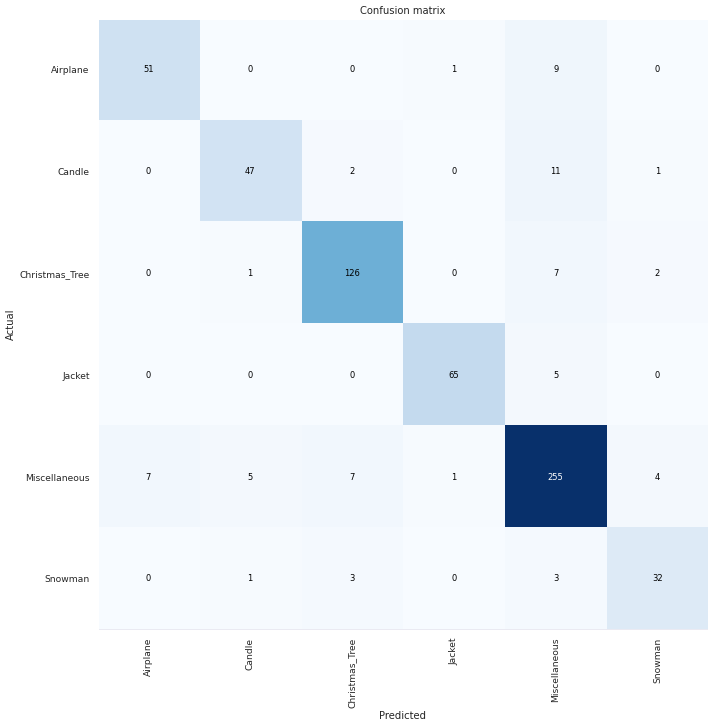

In [57]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

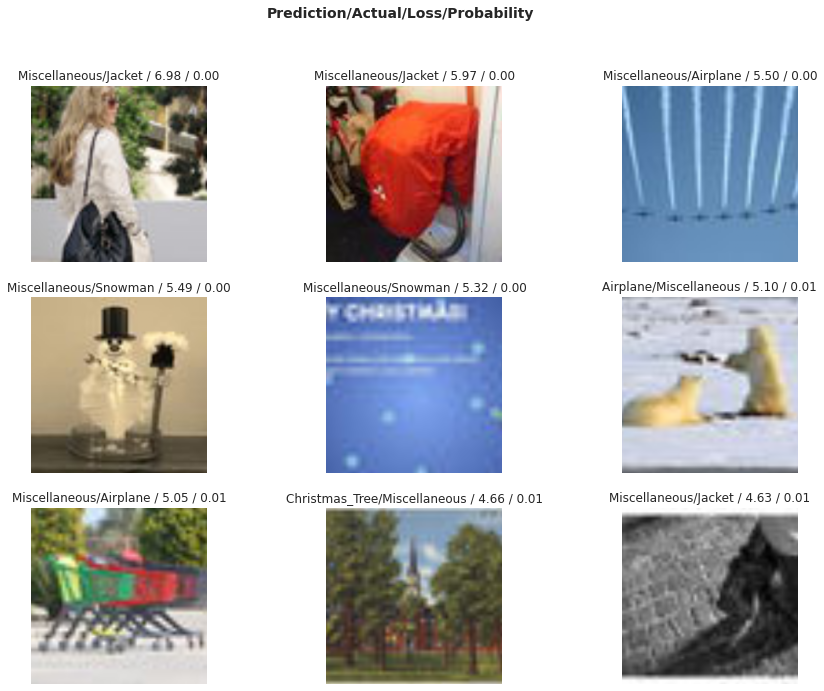

In [58]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## 4. Testing the model on a new image

In [59]:
test = pd.DataFrame()
test['Image'] = os.listdir('test')
test.head()

Image
0   image715.jpg
1  image2029.jpg
2  image6577.jpg
3  image9721.jpg
4  image3077.jpg

In [60]:
try:
  import os
  os.mkdir("results")
except:
  pass

In [61]:
lis = []
path = "results/"
for i in test.Image:
  source = r"/content/dataset/test/"+i
  destination = r"/content/dataset/results/"+i
  shutil.copy(source, destination)
  img = open_image(get_image_files(path)[0])
  pred_class,pred_idx,outputs = learn.predict(img)
  #img.show()
  lis.append(pred_class)
  print ("It is a", pred_class)
  os.remove(destination)
      #img = cv2.imread(source)
      #destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)

It is a Miscellaneous
It is a Snowman
It is a Miscellaneous
It is a Jacket
It is a Miscellaneous
It is a Airplane
It is a Miscellaneous
It is a Christmas_Tree
It is a Snowman
It is a Snowman
It is a Candle
It is a Christmas_Tree
It is a Jacket
It is a Snowman
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Candle
It is a Jacket
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Miscellaneous
It is a Airplane
It is a Candle
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Jacket
It is a Christmas_Tree
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Candle
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman


In [62]:
test['Class'] = lis

In [63]:
test.to_csv("resnet50.csv",index=False)

In [64]:
!cp resnet50.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/
#!cp /content/requirements.txt /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/

It is a Miscellaneous


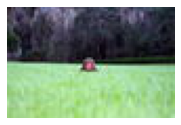

In [65]:
path = './test' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

## Display folder structure

In [ ]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/crotalus-viridis
/content/dataset/created/train_set/crotalus-ruber
/content/dataset/created/train_set/diadophis-punctatus
/content/dataset/created/train_set/agkistrodon-piscivorus
/content/dataset/created/train_set/pantherophis-alleghaniensis
/content/dataset/created/train_set/lampropeltis-californiae
/content/dataset/created/train_set/pantherophis-guttatus
/content/dataset/created/train_set/crotalus-scutulatus
/content/dataset/created/train_set/crotalus-atrox
/content/dataset/created/train_set/nerodia-fasciata
/content/dataset/created/train_set/agkistrodon-contortrix
/content/dataset/created/train_set/rhinocheilus-lecontei
/content/dataset/created/train_set/pantherophis-vulpinus
/content/dataset/created/train_set/storeria-dekayi
/content/dataset/created/train_set/thamnophis-elegans
/content/dataset/created/train_set/crotalus-horridus
/content/dataset/created/train_set/opheod

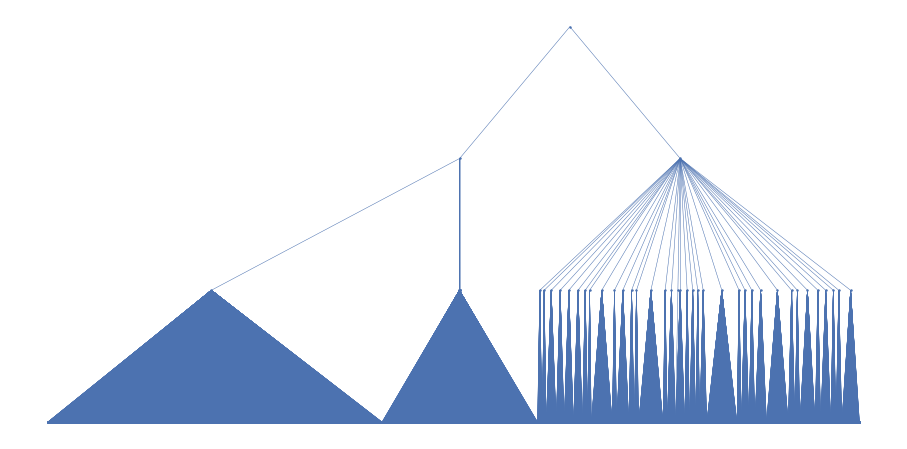

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

# RESNET152

In [ ]:
learn = cnn_learner(data, models.resnet152, metrics=[accuracy, error_rate, Recall(), Precision()])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


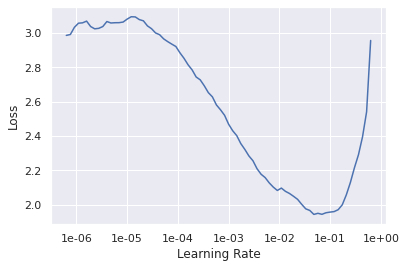

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
#learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-2))

## 3. Results Interpretation and Visualization

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

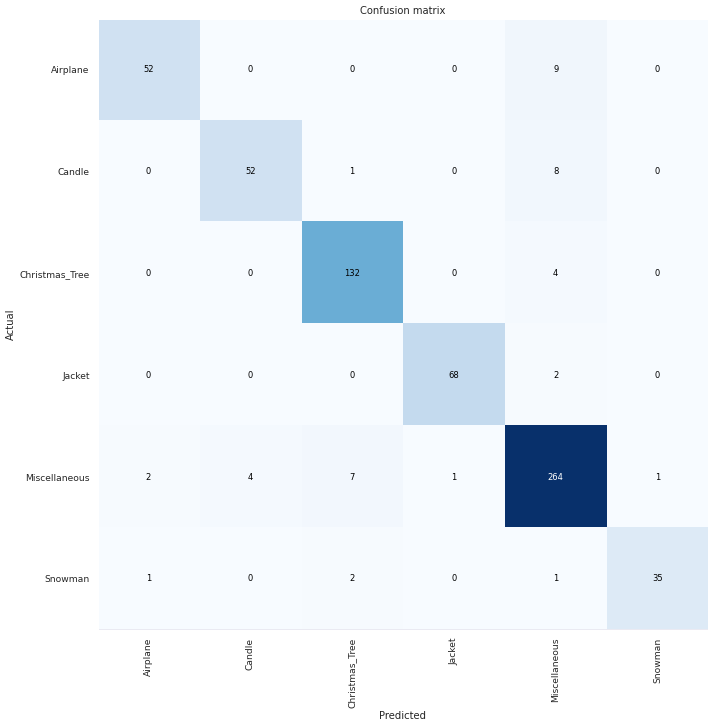

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

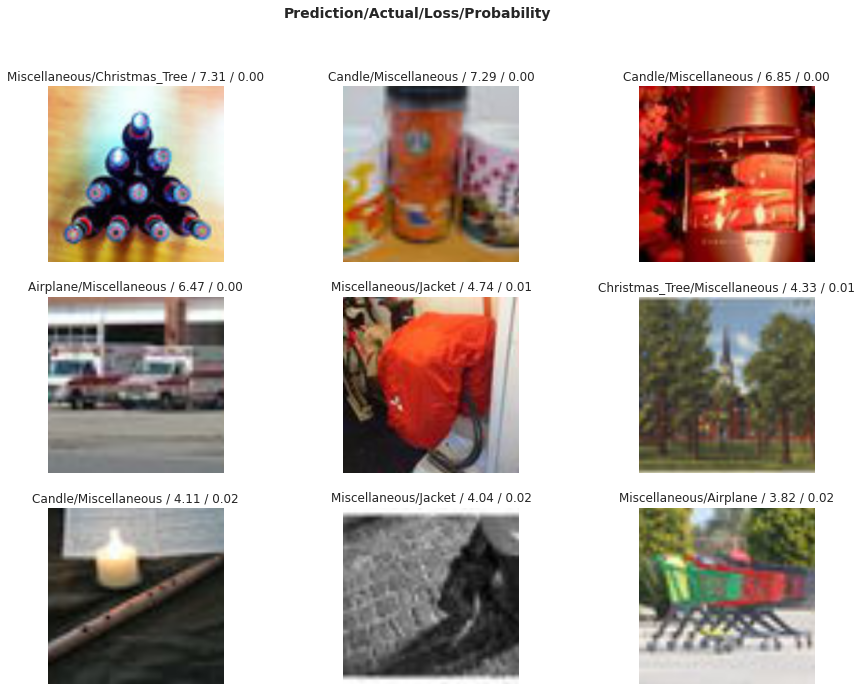

In [ ]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## 4. Testing the model on a new image

In [ ]:
test = pd.DataFrame()
test['Image'] = os.listdir('test')
test.head()

Image
0   image715.jpg
1  image2029.jpg
2  image6577.jpg
3  image9721.jpg
4  image3077.jpg

In [ ]:
try:
  import os
  os.mkdir("results")
except:
  pass

In [ ]:
lis = []
path = "results/"
for i in test.Image:
  source = r"/content/dataset/test/"+i
  destination = r"/content/dataset/results/"+i
  shutil.copy(source, destination)
  img = open_image(get_image_files(path)[0])
  pred_class,pred_idx,outputs = learn.predict(img)
  #img.show()
  lis.append(pred_class)
  print ("It is a", pred_class)
  os.remove(destination)
      #img = cv2.imread(source)
      #destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)

It is a Miscellaneous
It is a Snowman
It is a Miscellaneous
It is a Jacket
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Candle
It is a Christmas_Tree
It is a Jacket
It is a Snowman
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Candle
It is a Jacket
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Airplane
It is a Candle
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Jacket
It is a Christmas_Tree
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Snowman
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Candle
It is a Airplane
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman


In [ ]:
test['Class'] = lis

In [ ]:
test.to_csv("resnet152.csv",index=False)

In [ ]:
!cp resnet152.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/
#!cp /content/requirements.txt /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/

It is a Miscellaneous


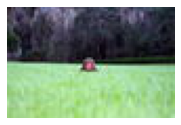

It is a Miscellaneous


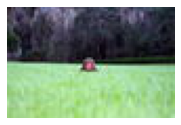

It is a Miscellaneous


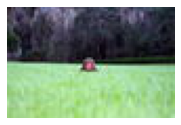

It is a Miscellaneous


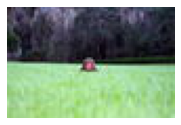

It is a Miscellaneous


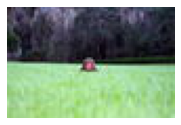

It is a Miscellaneous


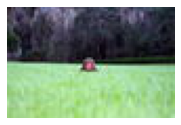

It is a Miscellaneous


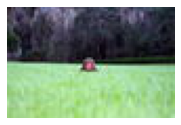

In [ ]:
path = './test' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

## Display folder structure

In [ ]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/results
/content/dataset/train
/content/dataset/test
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/Jacket
/content/dataset/created/train_set/models
/content/dataset/created/train_set/Candle
/content/dataset/created/train_set/Airplane
/content/dataset/created/train_set/Miscellaneous
/content/dataset/created/train_set/Snowman
/content/dataset/created/train_set/Christmas_Tree


# RESNET34

In [81]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate, Recall(), Precision()])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


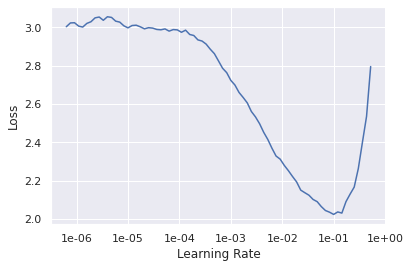

In [82]:
learn.lr_find();
learn.recorder.plot()

In [83]:
#learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))
learn.fit_one_cycle(10,max_lr=slice(1e-4,1e-2))

## 3. Results Interpretation and Visualization

In [84]:
interp = ClassificationInterpretation.from_learner(learn)

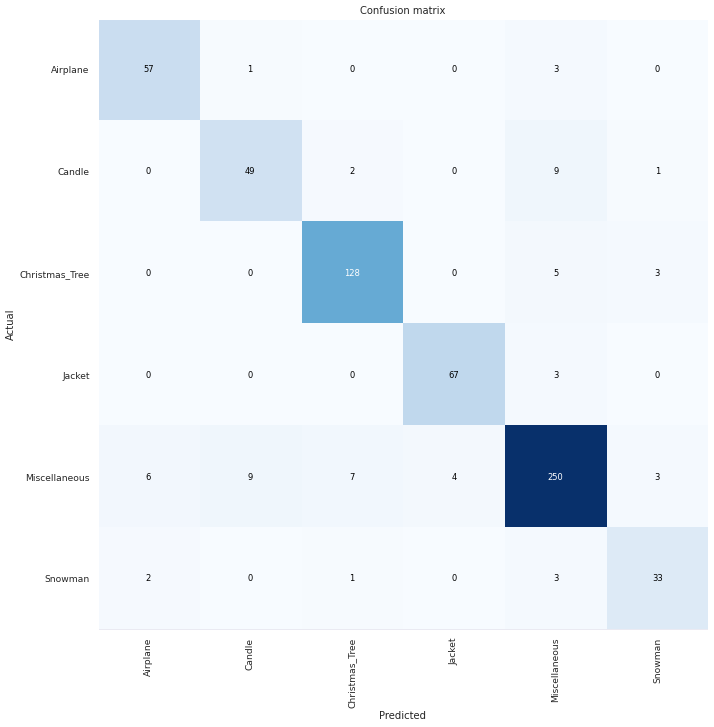

In [85]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

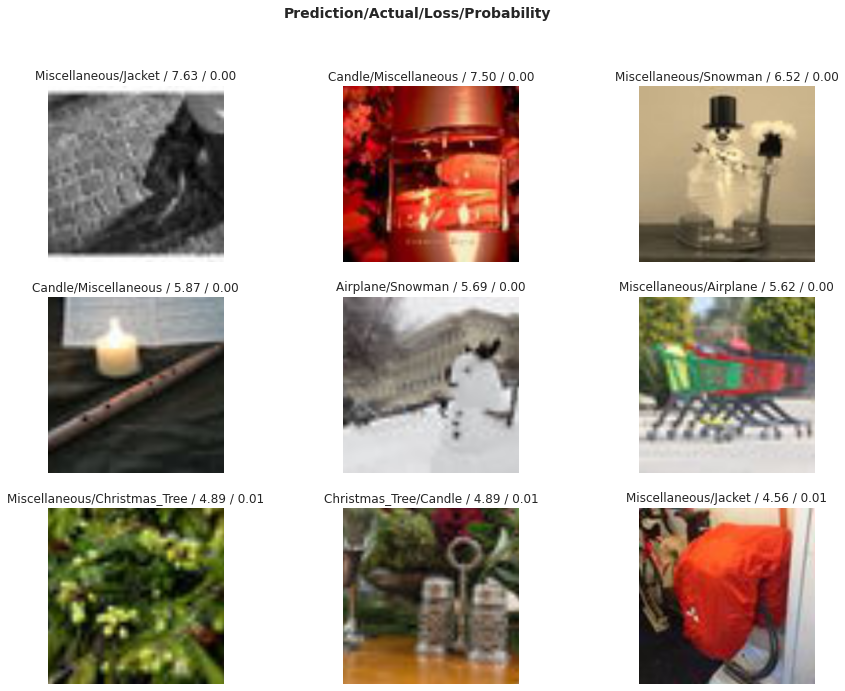

In [86]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

## 4. Testing the model on a new image

In [87]:
test = pd.DataFrame()
test['Image'] = os.listdir('test')
test.head()

Image
0   image715.jpg
1  image2029.jpg
2  image6577.jpg
3  image9721.jpg
4  image3077.jpg

In [88]:
try:
  import os
  os.mkdir("results")
except:
  pass

In [89]:
lis = []
path = "results/"
for i in test.Image:
  source = r"/content/dataset/test/"+i
  destination = r"/content/dataset/results/"+i
  shutil.copy(source, destination)
  img = open_image(get_image_files(path)[0])
  pred_class,pred_idx,outputs = learn.predict(img)
  #img.show()
  lis.append(pred_class)
  print ("It is a", pred_class)
  os.remove(destination)
      #img = cv2.imread(source)
      #destination = "created/train_set/"+j+"/"+i
      #img = cv2.resize(img, (224, 224,3))
      #cv2.imwrite(destination, img)

It is a Miscellaneous
It is a Snowman
It is a Miscellaneous
It is a Jacket
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Snowman
It is a Christmas_Tree
It is a Christmas_Tree
It is a Jacket
It is a Snowman
It is a Miscellaneous
It is a Miscellaneous
It is a Snowman
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Christmas_Tree
It is a Miscellaneous
It is a Candle
It is a Jacket
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Airplane
It is a Candle
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Jacket
It is a Christmas_Tree
It is a Airplane
It is a Christmas_Tree
It is a Miscellaneous
It is a Miscellaneous
It is a Christmas_Tree
It is a Miscellaneous
It is a Christmas_Tree
It is a Candle
It is a Airplane
It is a Miscellaneous
It is a Miscellaneous
It is a Miscellaneous
It is a 

In [ ]:
test['Class'] = lis

In [ ]:
test.to_csv("resnet34.csv",index=False)

In [ ]:
!cp resnet34.csv /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/
#!cp /content/requirements.txt /content/drive/MyDrive/project/HackerEarth/STILLthe_season_to_be_jolly/

It is a Miscellaneous


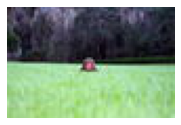

In [90]:
path = './test' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

## Display folder structure

In [79]:
import os 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk(r'/content/dataset', topdown=True): 
        print (root) 

/content/dataset
/content/dataset/results
/content/dataset/train
/content/dataset/test
/content/dataset/created
/content/dataset/created/train_set
/content/dataset/created/train_set/Jacket
/content/dataset/created/train_set/models
/content/dataset/created/train_set/Candle
/content/dataset/created/train_set/Airplane
/content/dataset/created/train_set/Miscellaneous
/content/dataset/created/train_set/Snowman
/content/dataset/created/train_set/Christmas_Tree
